# Time Series Forecasting

### Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from statsmodels.stats.descriptivestats import describe
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from pycaret.time_series import *
import logging

mpl.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-whitegrid')
logging.disable(logging.CRITICAL)

### Loading the Dataset

In [2]:
df = pd.read_csv('mauna_loa_co2.csv', index_col = 'datetime', parse_dates = True) 
df.head(5)

,CO2
datetime,
1958-03-31,315.70
1958-04-30,317.45
1958-05-31,317.51
1958-06-30,317.25
1958-07-31,315.86


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 766 entries, 1958-03-31 to 2021-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO2     766 non-null    float64
dtypes: float64(1)
memory usage: 12.0 KB


### Time Series Analysis

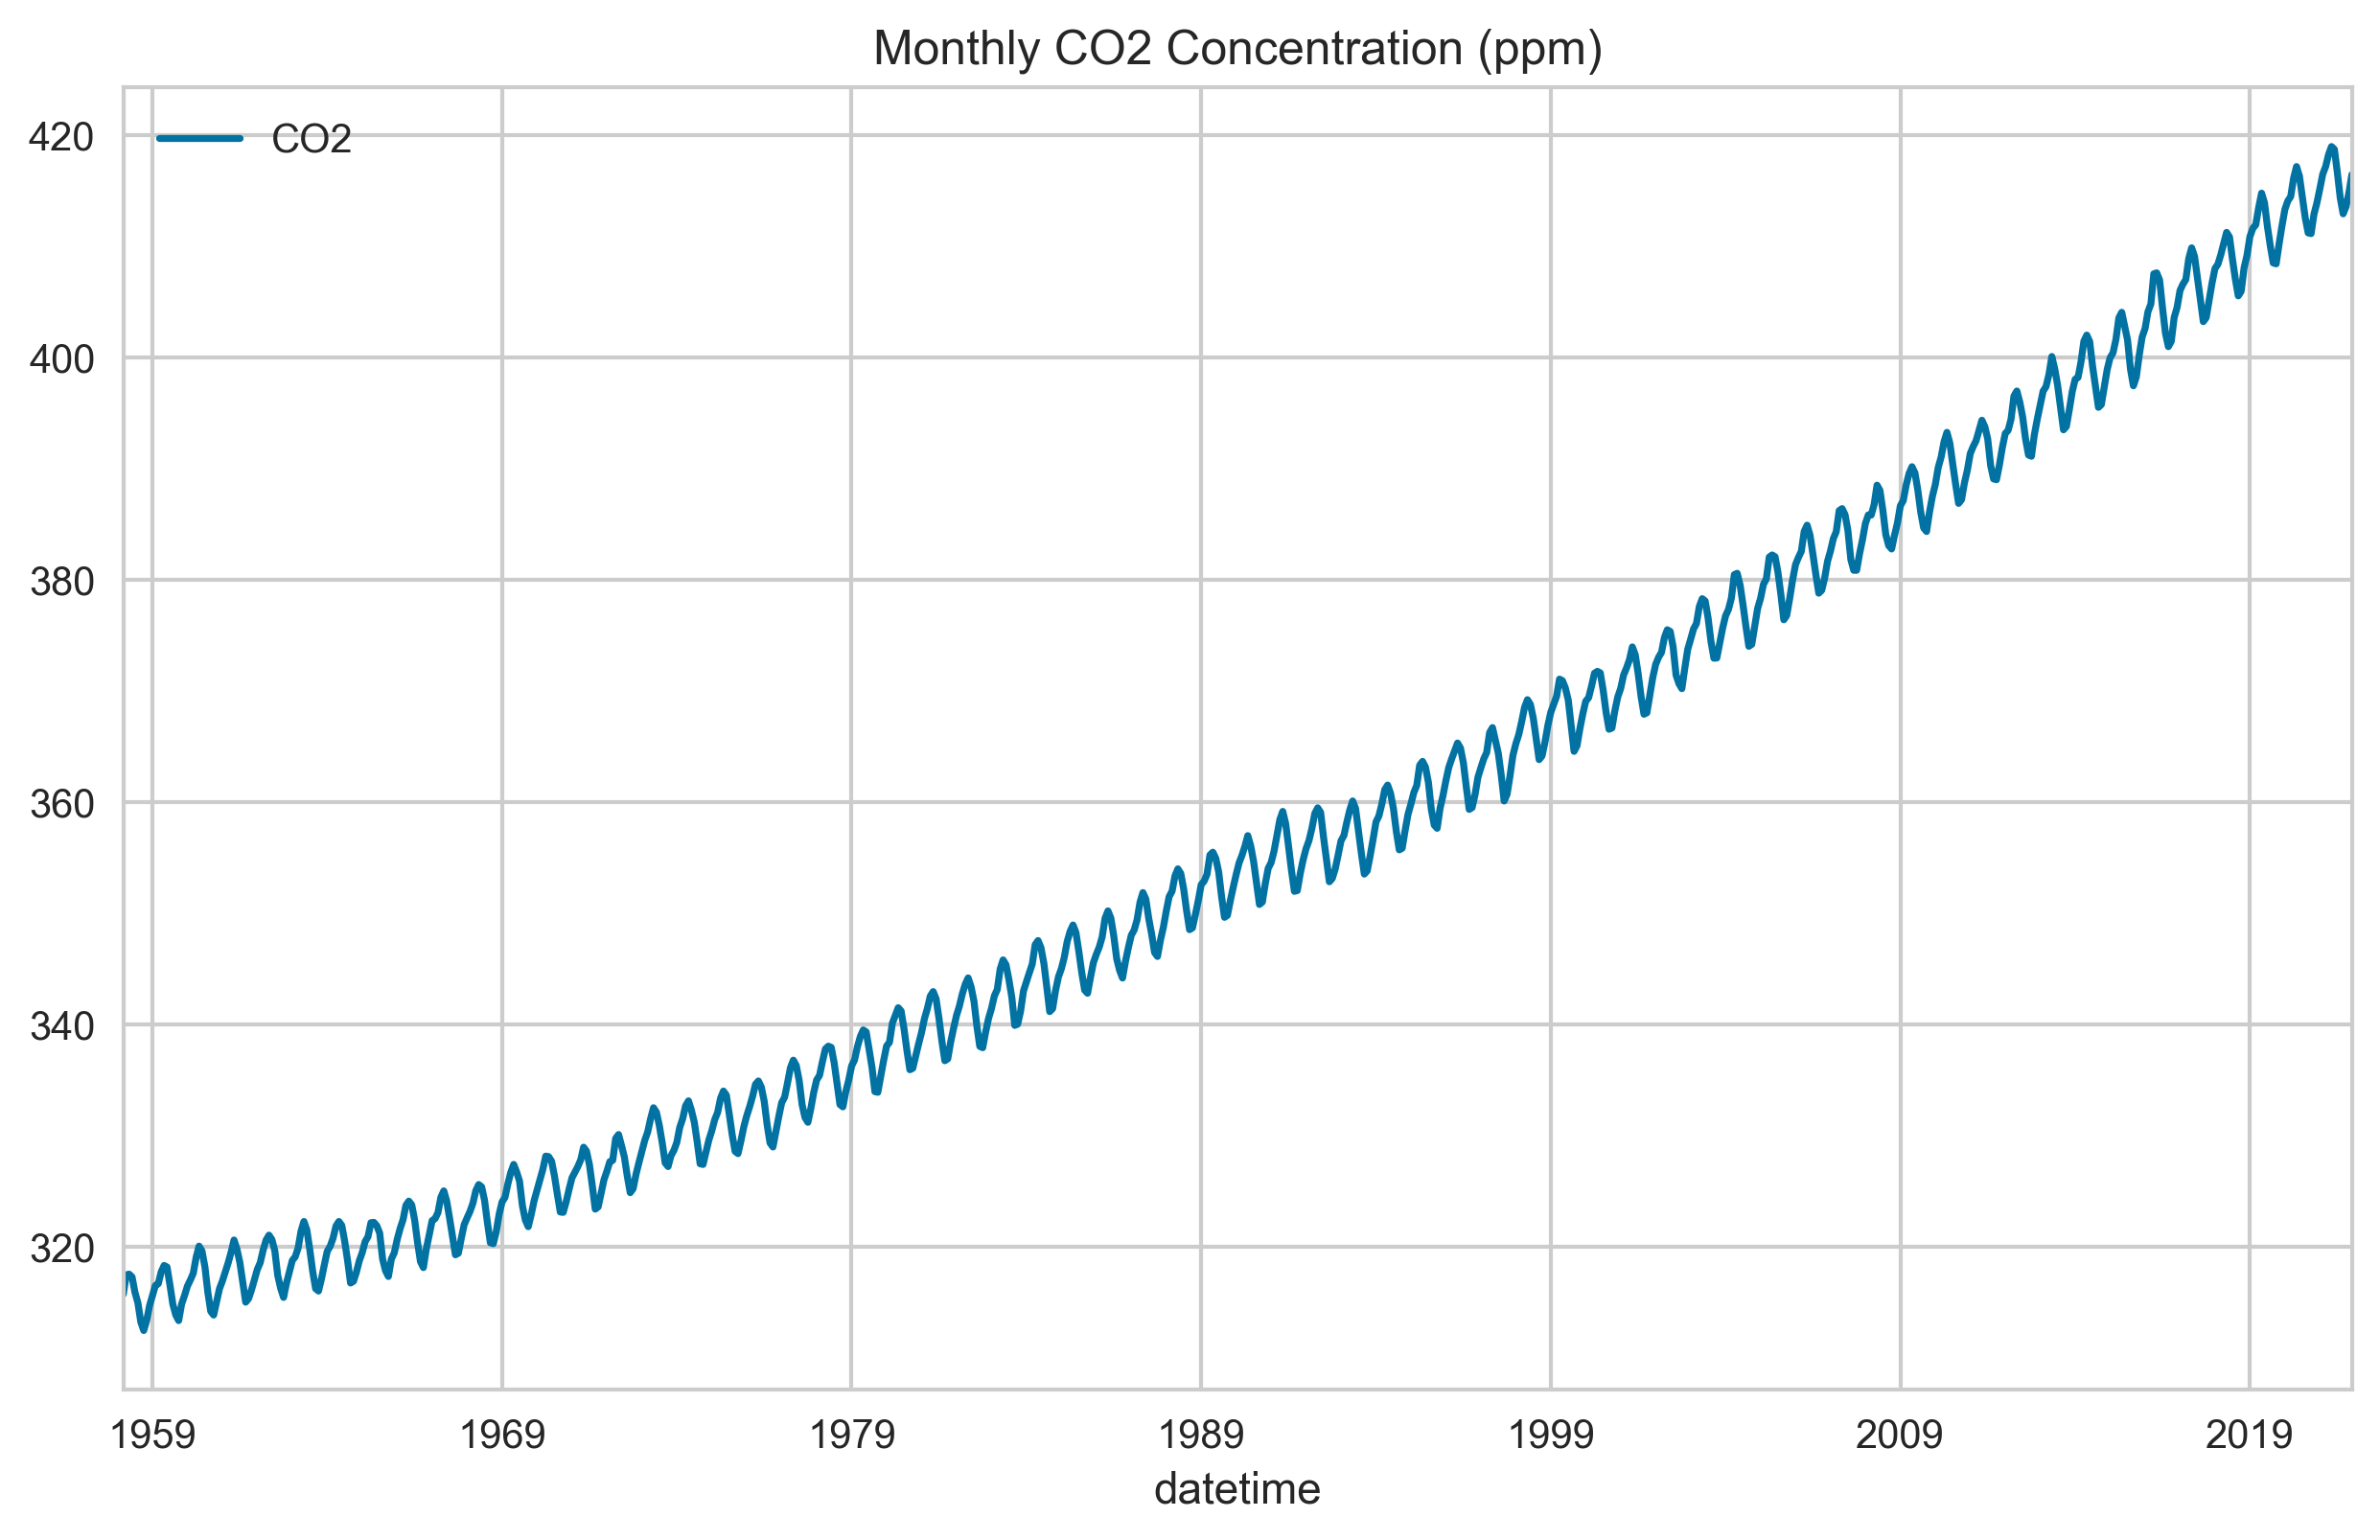

In [4]:
df.plot(figsize = (10,6))
plt.title('Monthly CO2 Concentration (ppm)')

plt.show()

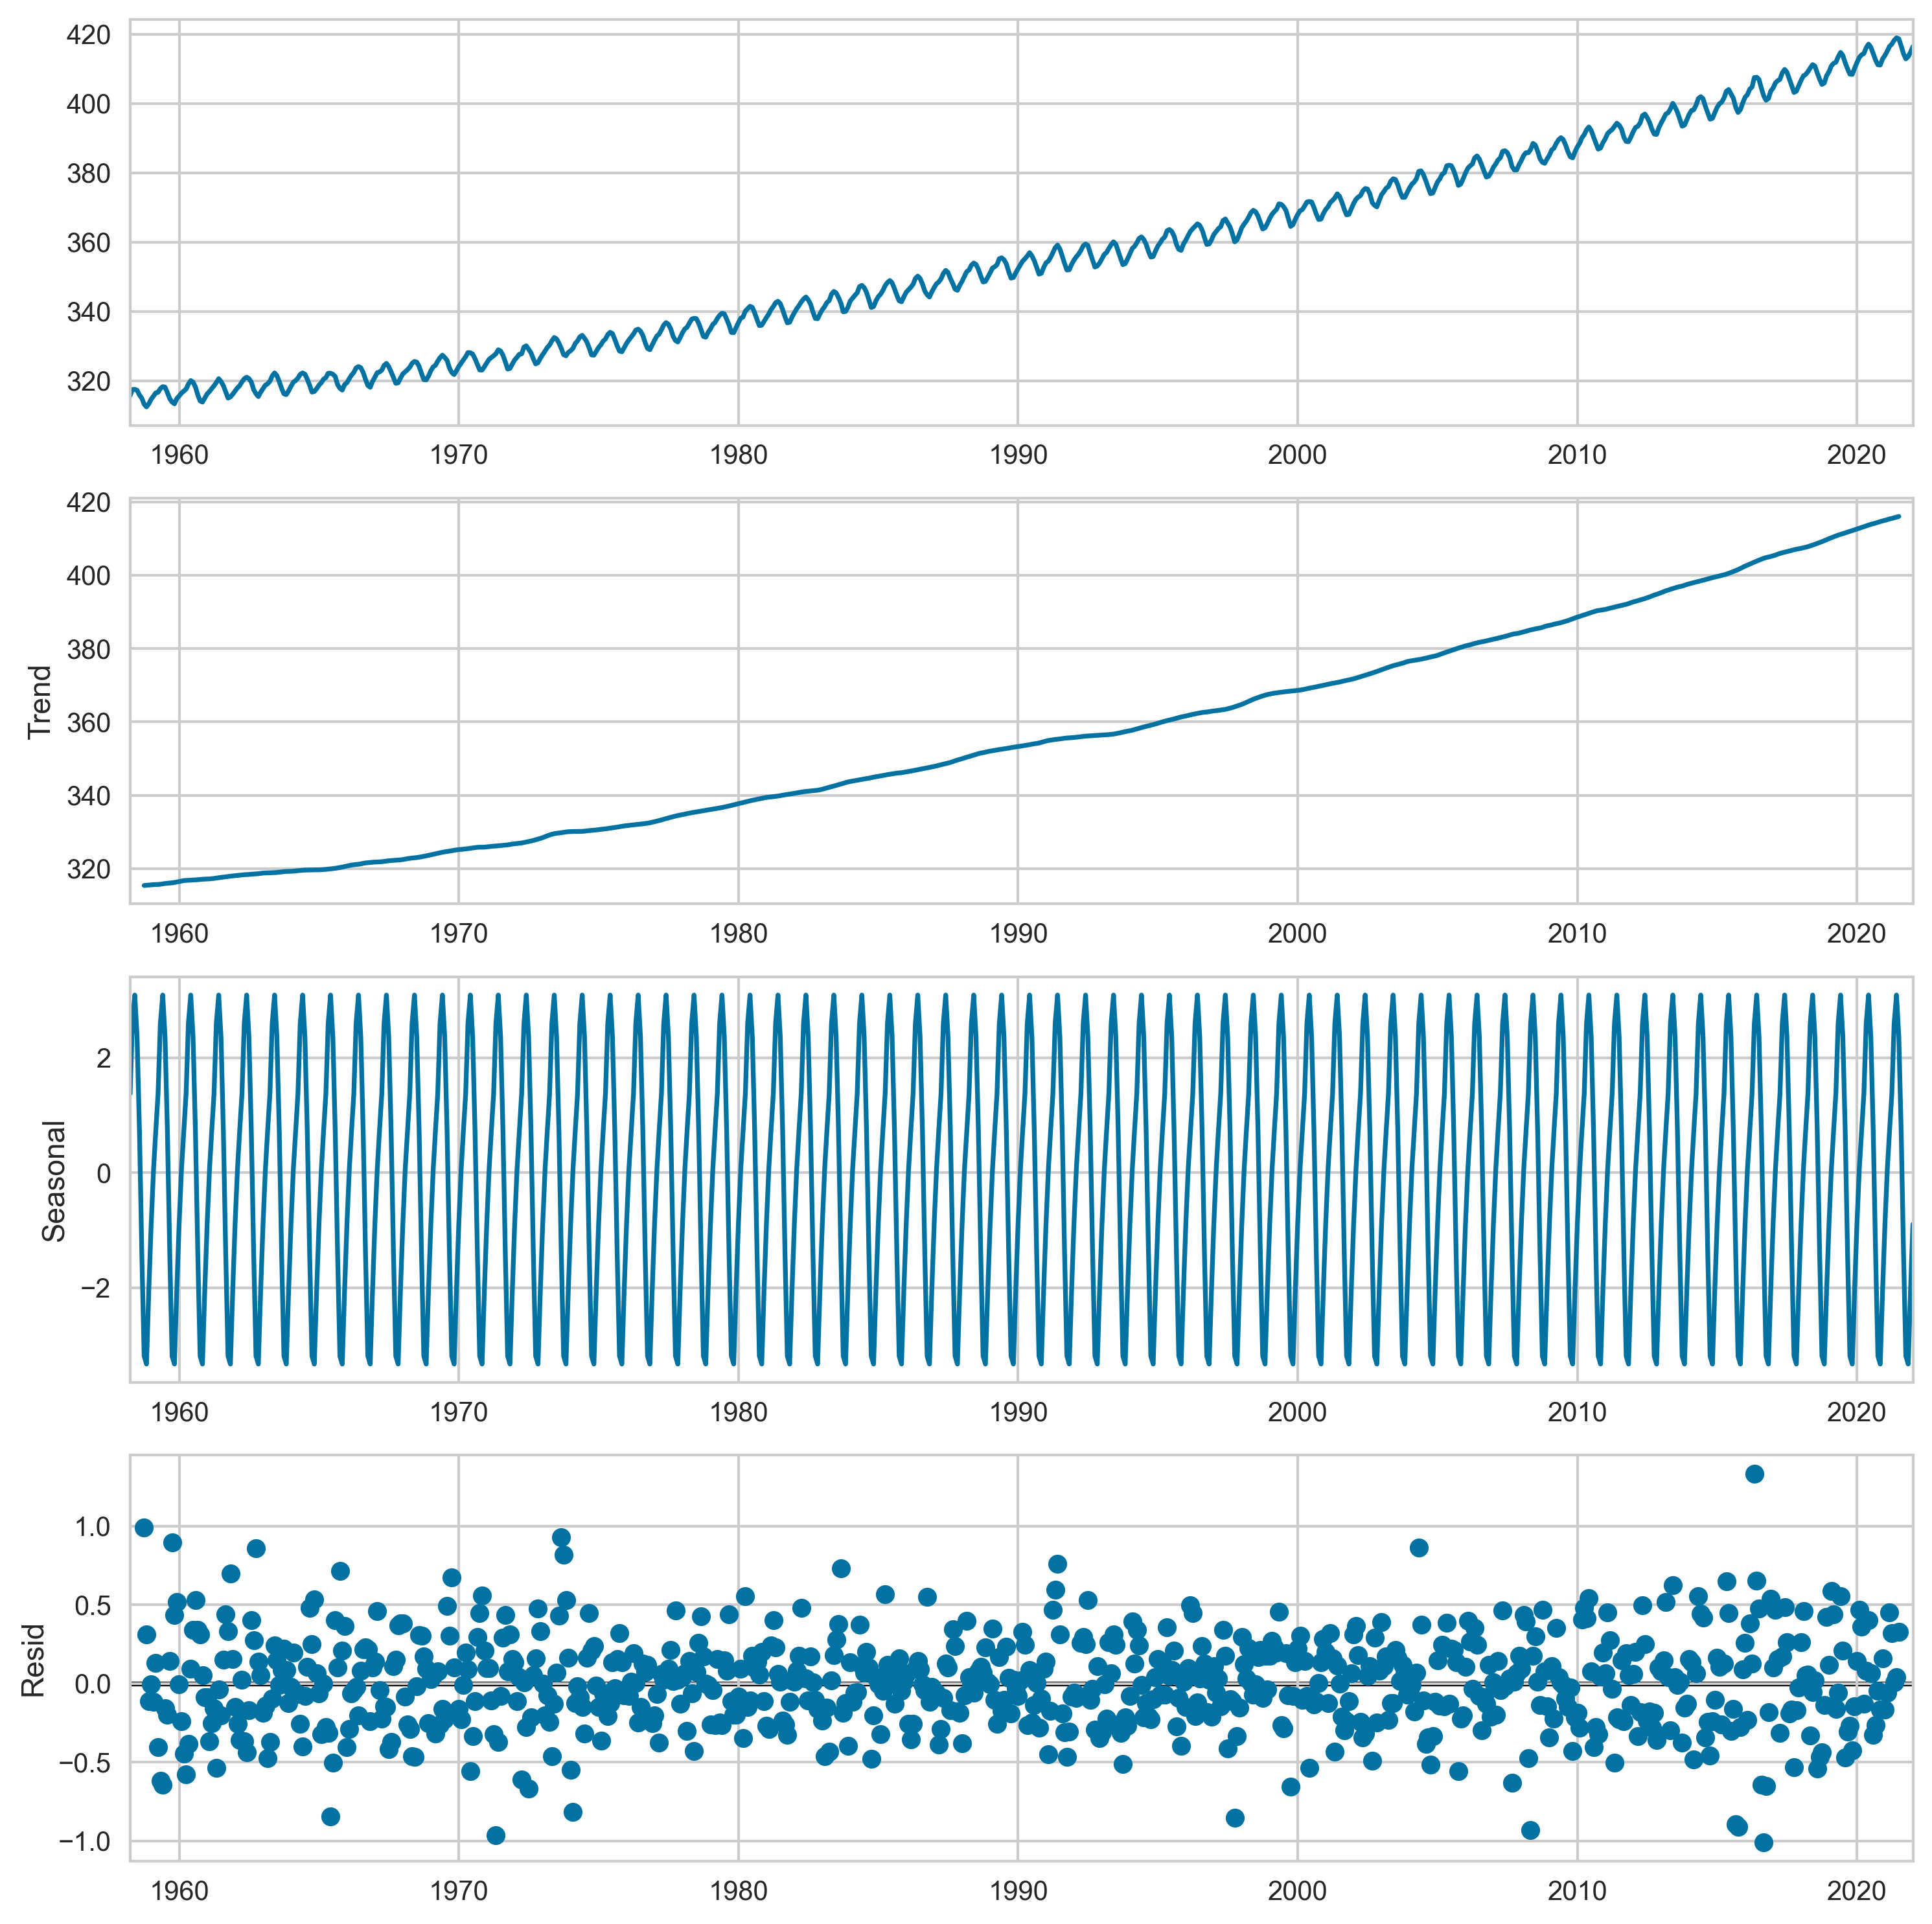

In [5]:
mpl.rcParams['figure.figsize'] = (10, 10)
result = seasonal_decompose(df)


result.plot()

plt.show()

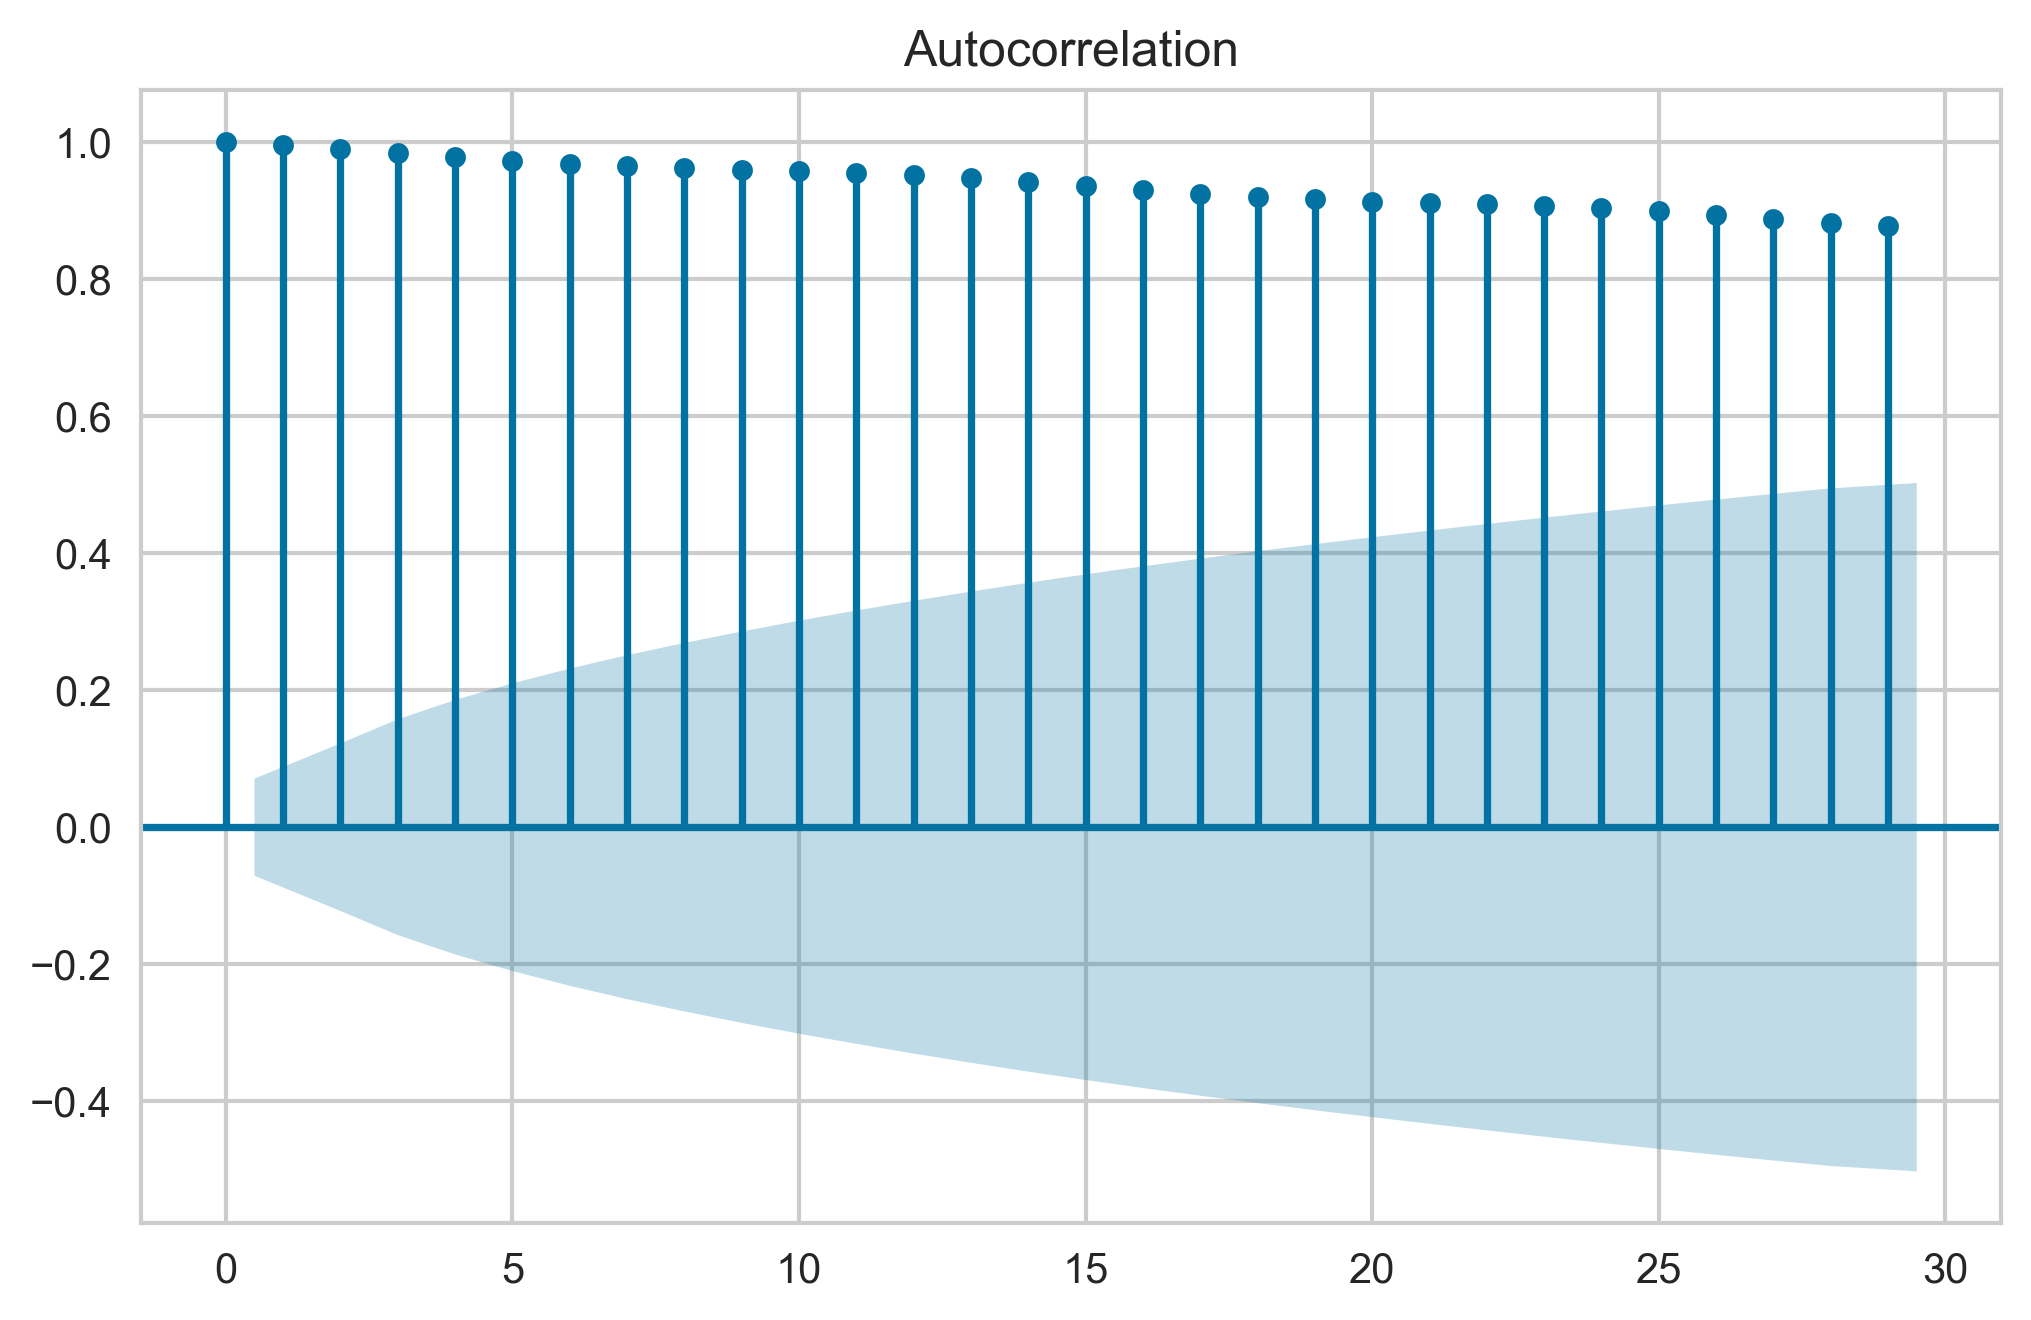

In [6]:
fig, ax = plt.subplots(figsize = (8,5))

plot_acf(df, ax = ax)

plt.show()

### Initializing the PyCaret Environment

In [7]:
ts = setup(df, fh = 36, session_id = 6501)

,Description,Value
0,session_id,6501
1,Target,CO2
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(766, 1)"
5,Transformed data shape,"(766, 1)"
6,Transformed train set shape,"(730, 1)"
7,Transformed test set shape,"(36, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


### Running Statistical Tests

In [8]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,766.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,356.594909
3,Summary,Statistics,Transformed,Median,,353.395
4,Summary,Statistics,Transformed,Standard Deviation,,29.785854
5,Summary,Statistics,Transformed,Variance,,887.197074
6,Summary,Statistics,Transformed,Kurtosis,,-1.045679
7,Summary,Statistics,Transformed,Skewness,,0.365126
8,Summary,Statistics,Transformed,# Distinct Values,,737.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",16756.959895


### Comparing Forecasting Models

In [10]:
compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,0.2985,0.3306,0.4358,0.5355,0.0011,0.0011,0.9552,1.0667
ets,ETS,0.3002,0.3322,0.4382,0.5380,0.0011,0.0011,0.9546,0.5733
auto_arima,Auto ARIMA,0.4452,0.4543,0.6521,0.7379,0.0016,0.0016,0.9156,44.3367
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.1630,1.1549,1.7009,1.8730,0.0043,0.0043,0.4678,0.1167
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.1630,1.1549,1.7009,1.8730,0.0043,0.0043,0.4678,0.1067
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1.1670,1.1582,1.7067,1.8784,0.0043,0.0043,0.4647,0.1267
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1.1701,1.1608,1.7113,1.8828,0.0043,0.0043,0.4623,0.0933
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.3127,1.2565,1.9268,2.0446,0.0048,0.0048,0.3567,0.1700
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.3175,1.3311,1.9245,2.1565,0.0048,0.0048,0.2929,0.0867
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.3504,1.3426,1.9758,2.1782,0.0049,0.0050,0.2801,0.0900


Processing:   0%|          | 0/125 [00:00<?, ?it/s]

ExponentialSmoothing(seasonal='mul', sp=12, trend='add')

### Creating the Model

In [11]:
model = create_model('exp_smooth')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2009-12,0.3641,0.3893,0.5165,0.6132,0.0013,0.0013,0.9380
1,2012-12,0.2177,0.2630,0.3183,0.4265,0.0008,0.0008,0.9736
2,2015-12,0.3136,0.3396,0.4725,0.5666,0.0012,0.0012,0.9538
Mean,NaT,0.2985,0.3306,0.4358,0.5355,0.0011,0.0011,0.9552
SD,NaT,0.0607,0.0519,0.0850,0.0794,0.0002,0.0002,0.0146


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Plotting the Model

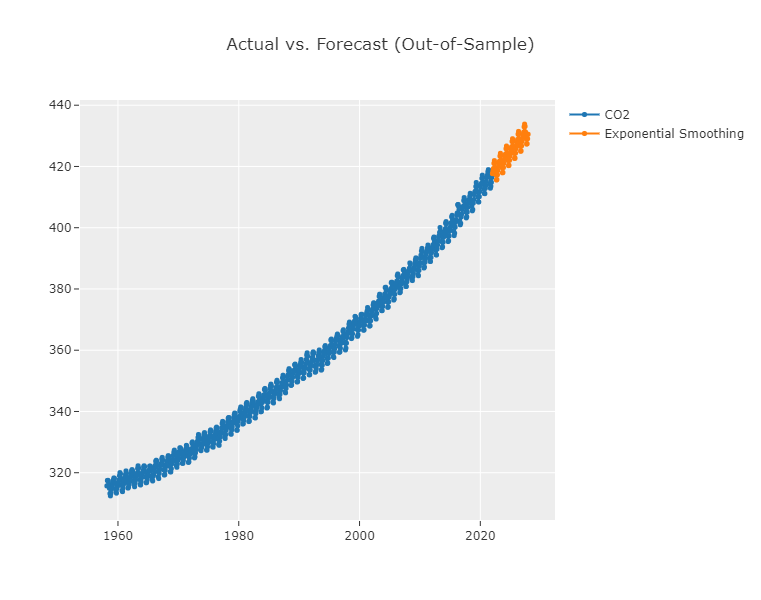

In [47]:
fig_kwargs={'renderer': 'jupyterlab',
            'height': 600, 'width': 800}

plot_model(model, fig_kwargs = fig_kwargs, data_kwargs = {"fh": 72})

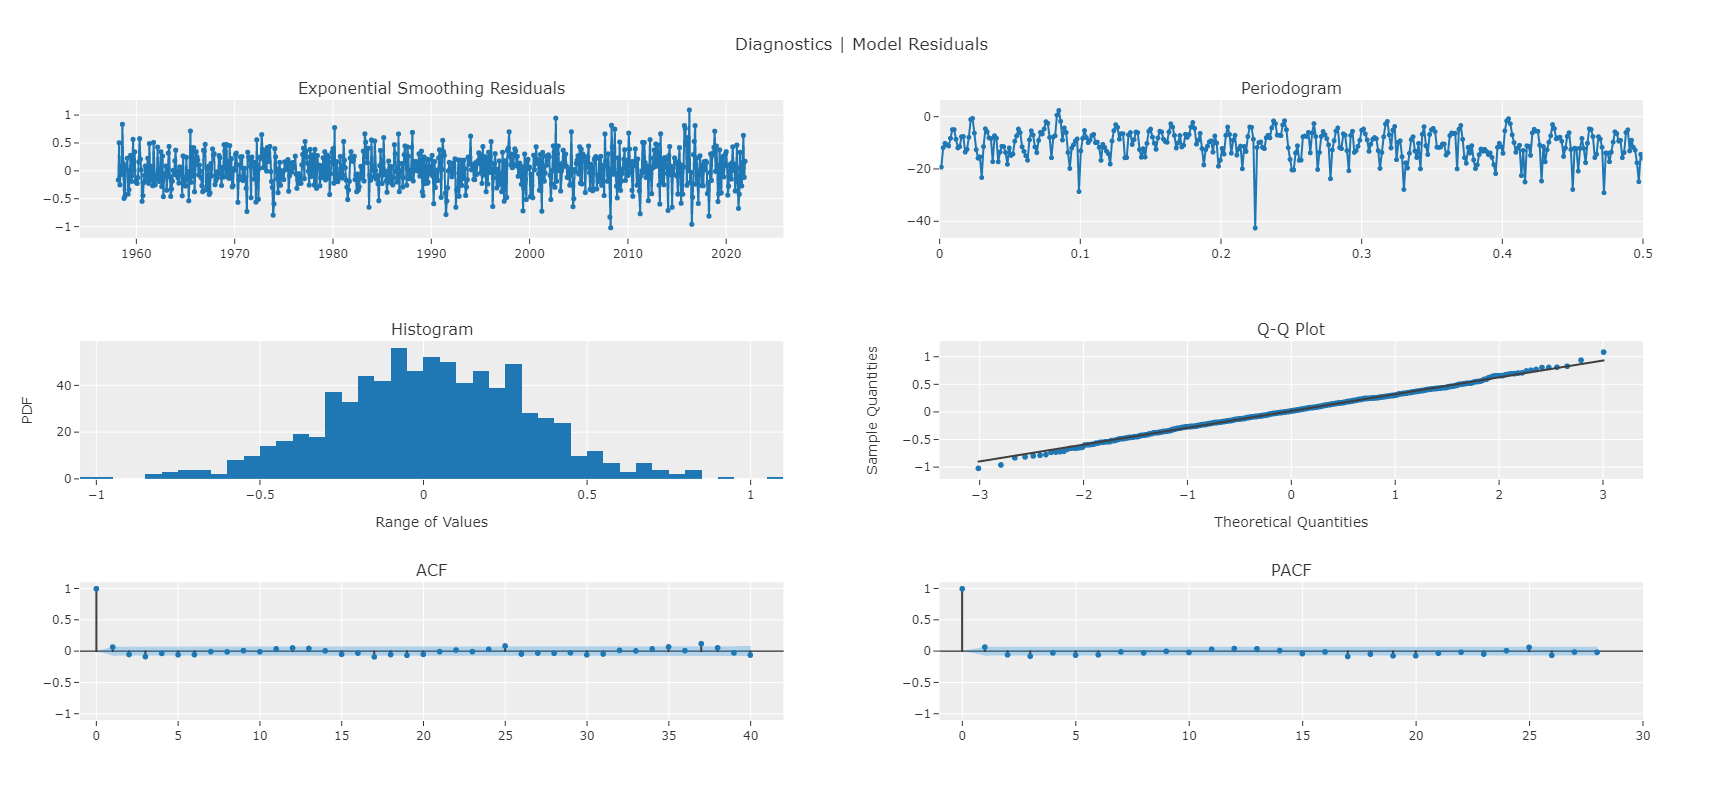

In [45]:
fig_kwargs={'renderer': 'jupyterlab',
            'height': 800, 'width': 800}

plot_model(model, 'diagnostics', fig_kwargs = fig_kwargs)

### Making Predictions

In [46]:
model = finalize_model(model)
predict_model(model, fh = 12)

,y_pred
2022-01,417.6595
2022-02,418.4937
2022-03,419.3036
2022-04,421.0311
2022-05,421.9005
2022-06,421.1949
2022-07,419.3796
2022-08,417.2623
2022-09,415.5830
2022-10,415.7002


In [17]:
save_model(model, "exp_smooth_model", verbose = True)

Transformation Pipeline and Model Successfully Saved


(ExponentialSmoothing(seasonal='mul', sp=12, trend='add'),
 'exp_smooth_model.pkl')